# Polynomial regression
En muchas ocasiones la relación entre los datos no va a ser lineal, por lo que una simple regresión lineal no se va a ajustar bien a nuestra problemática.

Por ejemplo, en el siguiente ejemplo encajaria muy bien una regresión lineal.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('data/salary_data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [2]:
X = df[['YearsExperience']]
y = df['Salary']

In [3]:
lin_reg = LinearRegression()

In [4]:
lin_reg.fit(X, y)

LinearRegression()

In [5]:
lin_reg.score(X,y)

0.9569566641435086

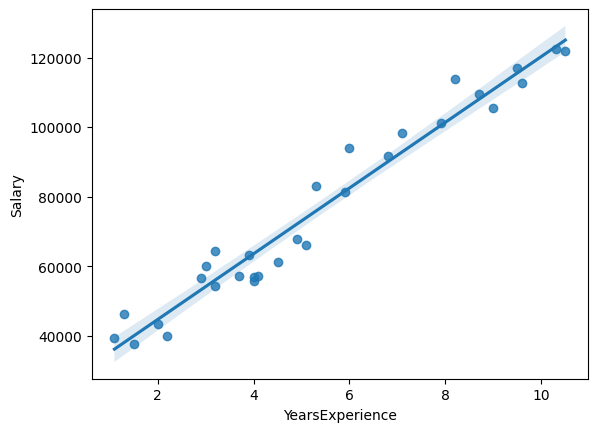

In [6]:
sns.regplot(data = df,
           x = 'YearsExperience',
           y = 'Salary');

En la vida real los problemas son más complejos, ya que los salarios no llevan una subida lineal vs años de experiencia, dependerá también de la carrera profesional: profesor, ingeniero, doctor...

Otra posible representación del salario podría ser en función del puesto de trabajo.

In [7]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [8]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [10]:
lin_reg.score(X,y)

0.6690412331929895

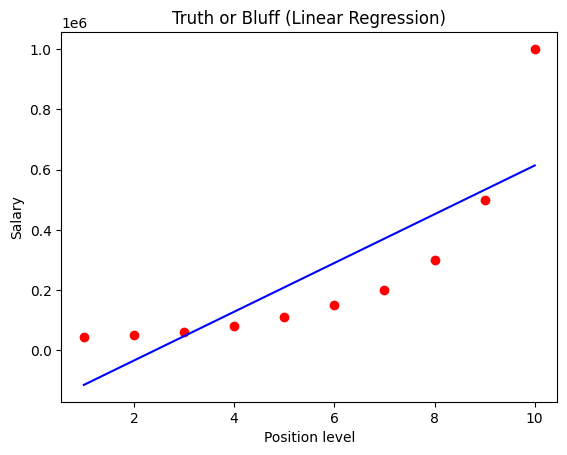

In [11]:
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

Vemos que en este caso, la regresión lineal no se ajusta nada bien a los datos, por lo que habrá que probar otras alternativas.

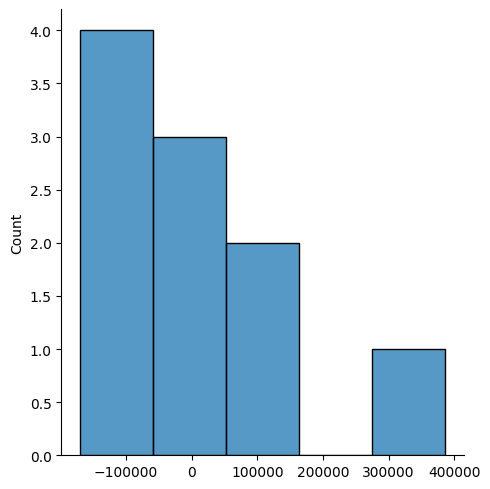

In [12]:
sns.displot(y - lin_reg.predict(X));

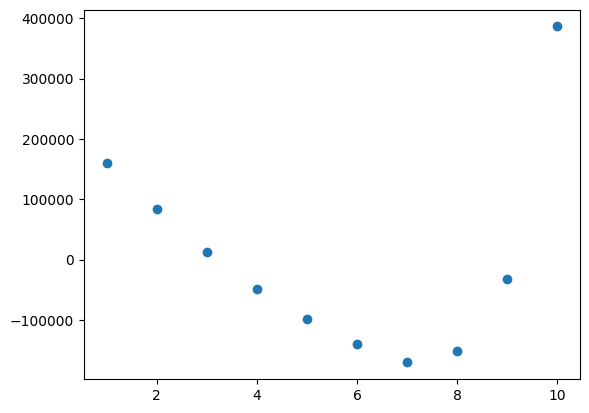

In [13]:
plt.scatter(X, y - lin_reg.predict(X));

`PolynomialFeatures` de sklearn genera nuevas features sintéticas, realizando todas las combinaciones posibles entre las potencias.

Si degree = 2 y tenemos dos features, devolverá: a^0, a^1, b^1, a^2, a\*b, b^2

En nuestro caso tenemos una única variable con degree = 3: a^0, a^1, a^2, a^3

In [14]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 5)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [16]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

In [17]:
pol_reg.coef_

array([ 0.00000000e+00,  1.60731002e+05, -1.00378788e+05,  2.81649184e+04,
       -3.44638695e+03,  1.57692308e+02])

`x^0 + x^1 + x^2 + x^3 + x^4 `

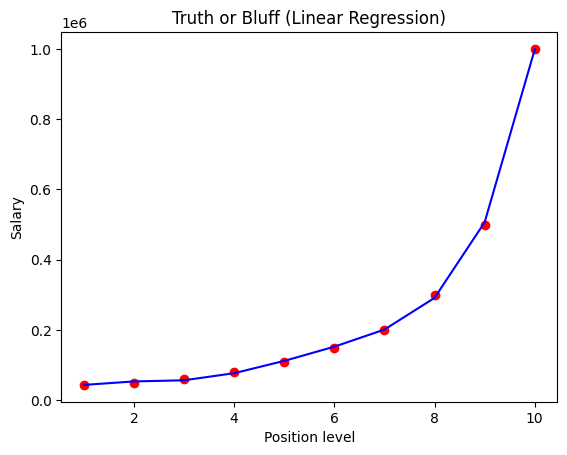

In [18]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [19]:
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [20]:
pol_reg.score(X_poly,y)

0.9997969027099753

Al añadir mucha complejidad podemos sobreajustar el modelo fácilmente

In [21]:
print(lin_reg.predict([[7]]))

[370818.18181818]


In [22]:
print(pol_reg.predict(poly_feats.transform([[7]])))

[201349.6503497]


In [23]:
df = pd.read_csv('data/position_salaries.csv')
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2)

In [26]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
predictions = pol_reg.predict(X_test)

In [28]:
df_preds = pd.DataFrame(predictions, columns = ['predictions'])
df_preds['real_value'] = pd.Series(y_test)

df_preds

,predictions,real_value
0,55121.886872,110000
1,75910.721824,150000


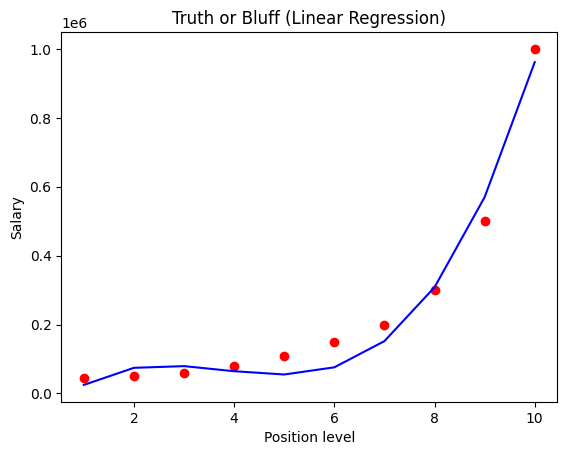

In [29]:
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(X_poly), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [30]:
pol_reg.score(X_poly,y)

0.9766393044119686

# Decisión final

### Regresión lineal

In [31]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=12)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 117757.35294117642
MAPE: 0.621629901960784
MSE: 16144048713.235283
RMSE: 127059.23308927723
r2_score train 0.6696578058045868
r2_score test 0.47284738895558265


#### Regresión polinómica grado 2

In [34]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

poly_feats = PolynomialFeatures(degree = 2)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 80182.39492466257
MAPE: 0.17927570711075813
MSE: 11624413613.806612
RMSE: 107816.57392908852
r2_score train 0.9306985085444903
r2_score test 0.62042731056958


#### Regresión polinómica grado 3

In [35]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

poly_feats = PolynomialFeatures(degree = 3)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 75733.05633498973
MAPE: 0.2650203252032536
MSE: 6468116429.645586
RMSE: 80424.60089826735
r2_score train 0.9929197843838078
r2_score test 0.7887961982156544


In [36]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

poly_feats = PolynomialFeatures(degree = 4)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 35697.62585541705
MAPE: 0.10747601225100356
MSE: 1683753165.7951517
RMSE: 41033.56145638777
r2_score train 0.9994604200254161
r2_score test 0.9450203047903624


In [37]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

poly_feats = PolynomialFeatures(degree = 6)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 11745.540322225948
MAPE: 0.029963388866269147
MSE: 218449009.6400347
RMSE: 14780.020623802753
r2_score train 0.9999999052407443
r2_score test 0.9928669711137947


Escogemos el modelo de regresión polinómica de grado 6, al ser el modelo que mejor generaliza!

In [38]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

poly_feats = PolynomialFeatures(degree = 7)
poly_feats.fit(X)
X_poly = poly_feats.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly,y, test_size = 0.2, random_state=12)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

predictions = lin_reg.predict(X_test)

print("MAE:", mean_absolute_error(y_test, predictions))
print("MAPE:", mean_absolute_percentage_error(y_test, predictions))
print("MSE:", mean_squared_error(y_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))
print("r2_score train", lin_reg.score(X_train, y_train))
print("r2_score test",lin_reg.score(X_test, y_test))

MAE: 12751.322758580092
MAPE: 0.030996472669862055
MSE: 270690210.6459013
RMSE: 16452.665761082648
r2_score train 1.0
r2_score test 0.9911611359789093
